In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("balanced_dataset_time.csv")



In [9]:

# Convert 'timestamp' to datetime for time-based analysis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.day_name()  # Extract day name for day-of-week analysis
df['hour'] = df['timestamp'].dt.hour              # Extract hour for hour-based analysis


In [10]:
# Display basic information about the dataset
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101285 entries, 0 to 101284
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   achash                        101285 non-null  object        
 1   timestamp                     101285 non-null  datetime64[ns]
 2   service_group                 101285 non-null  object        
 3   service_name                  101285 non-null  object        
 4   usage_minutes                 101285 non-null  int64         
 5   usage_percentage              101285 non-null  float64       
 6   mac_address                   101285 non-null  object        
 7   device_type                   101285 non-null  object        
 8   signal_strength               101285 non-null  float64       
 9   packet_loss_rate              101285 non-null  float64       
 10  latency                       101285 non-null  float64       
 11  jitter_ms    

### Distribution Analysis
## 1. Service Group Distribution Over Time
This part analyzes how different service groups are used over time. We’ll visualize the daily and hourly patterns for each service_group.

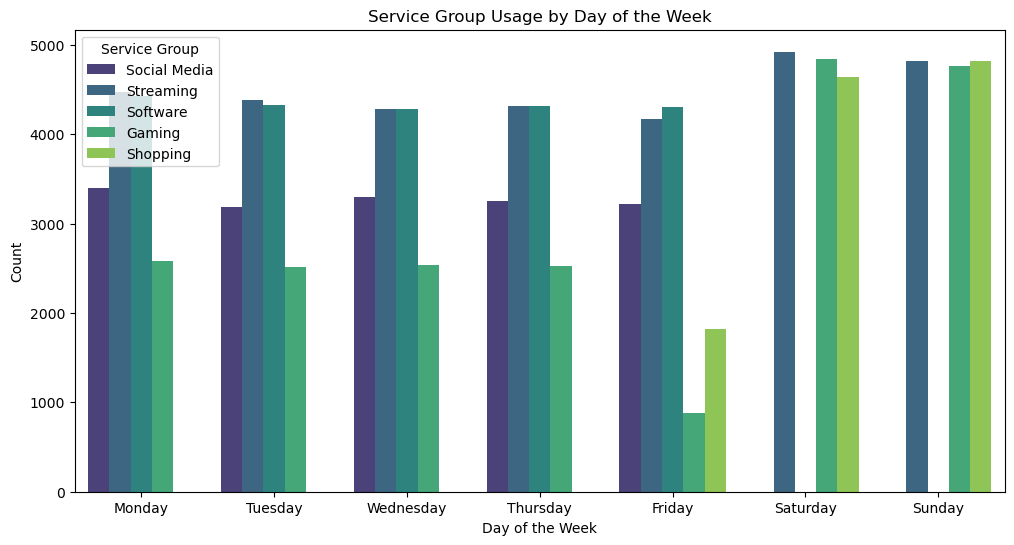

In [11]:
# Count of each service_group by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', hue='service_group', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Service Group Usage by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.legend(title='Service Group')
plt.show()



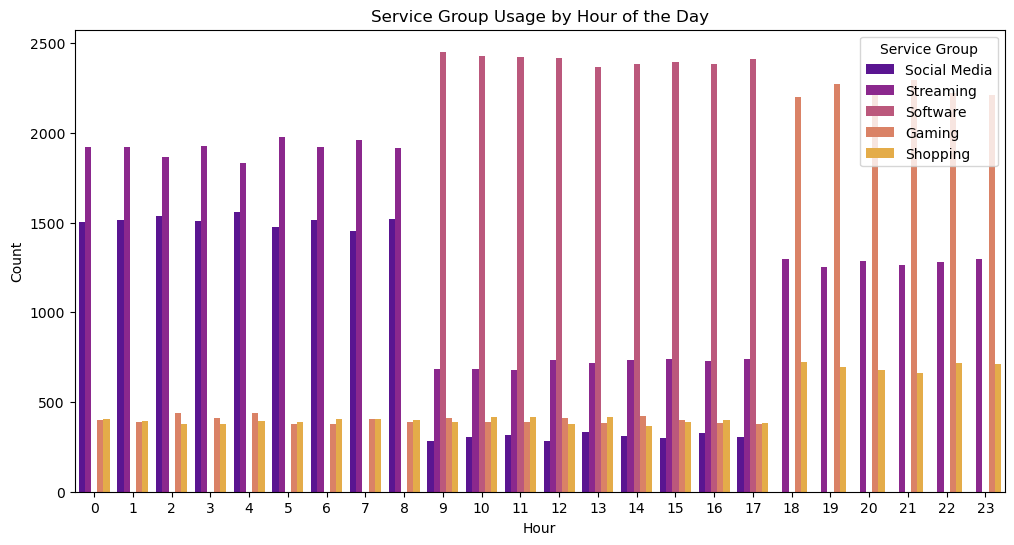

In [12]:
# Count of each service_group by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='service_group', palette='plasma')
plt.title("Service Group Usage by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend(title='Service Group')
plt.show()


## Usage Distribution Analysis
Analyze the usage minutes and percentage across different service groups.

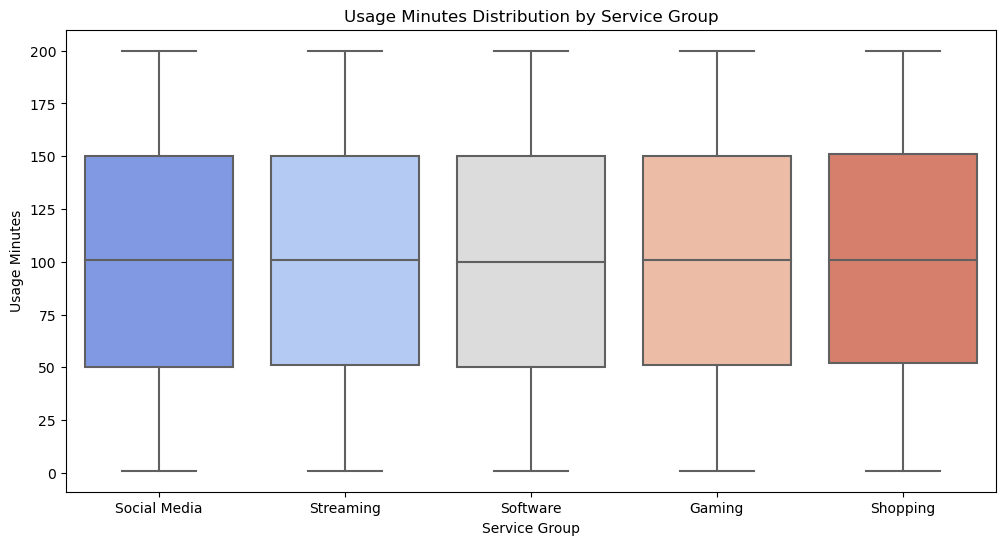

In [13]:
# Usage Minutes by Service Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='usage_minutes', palette='coolwarm')
plt.title("Usage Minutes Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Usage Minutes")
plt.show()



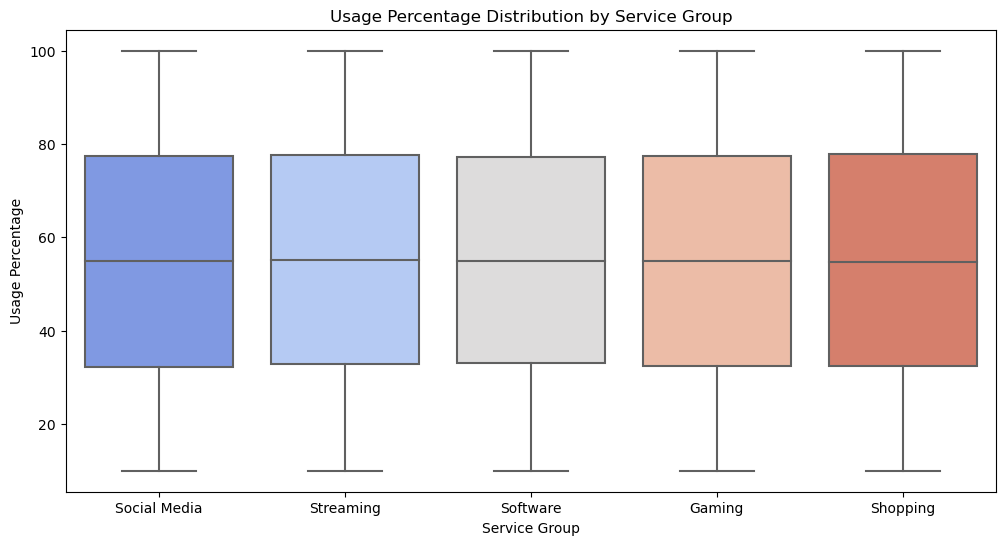

In [14]:
# Usage Percentage by Service Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='usage_percentage', palette='coolwarm')
plt.title("Usage Percentage Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Usage Percentage")
plt.show()


## Device Type Distribution
Check the distribution of device_type and how it varies across different service_group categories.

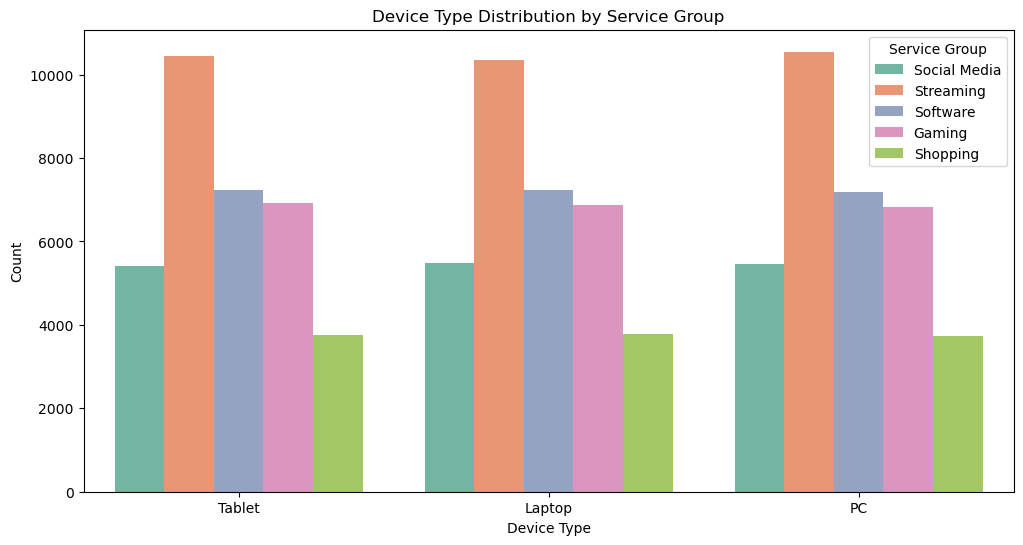

In [15]:
# Count of device type by service group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='device_type', hue='service_group', palette='Set2')
plt.title("Device Type Distribution by Service Group")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.legend(title='Service Group')
plt.show()


## Network Quality Metrics Distribution
Analyze metrics like signal_strength, latency, packet_loss_rate, jitter_ms, and bandwidth_speed_per_sec_mbps.

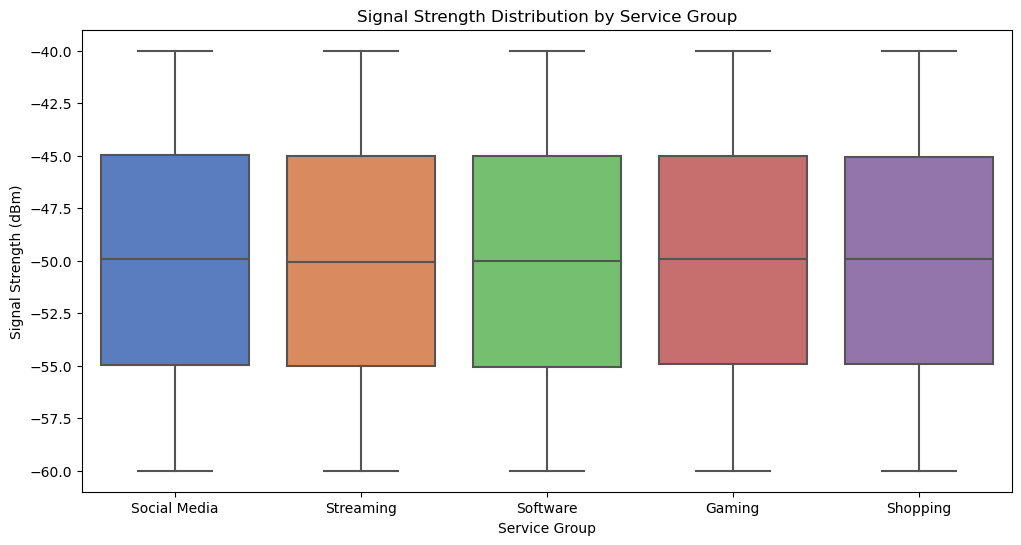

In [16]:
# Signal Strength Distribution by Service Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='signal_strength', palette='muted')
plt.title("Signal Strength Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Signal Strength (dBm)")
plt.show()


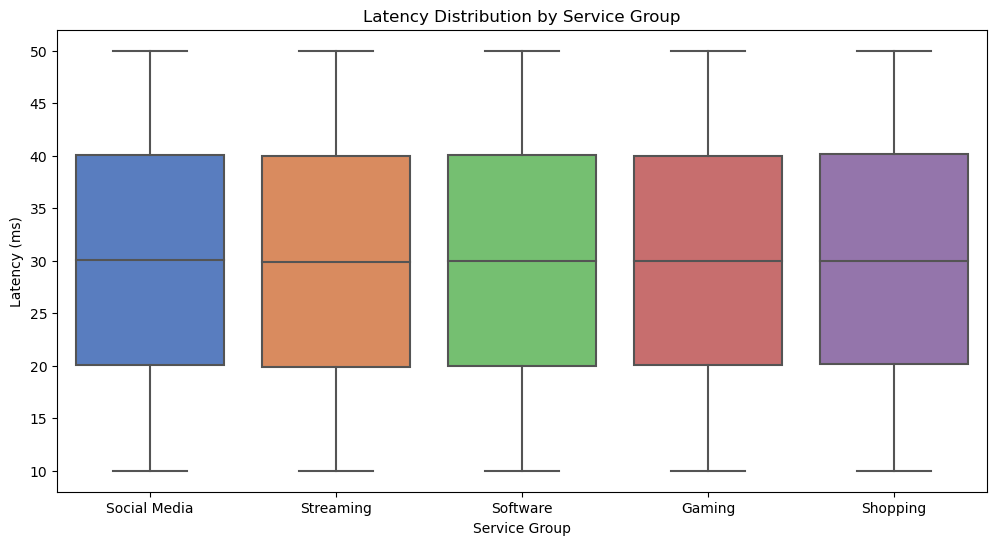

In [17]:

# Latency Distribution by Service Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='latency', palette='muted')
plt.title("Latency Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Latency (ms)")
plt.show()


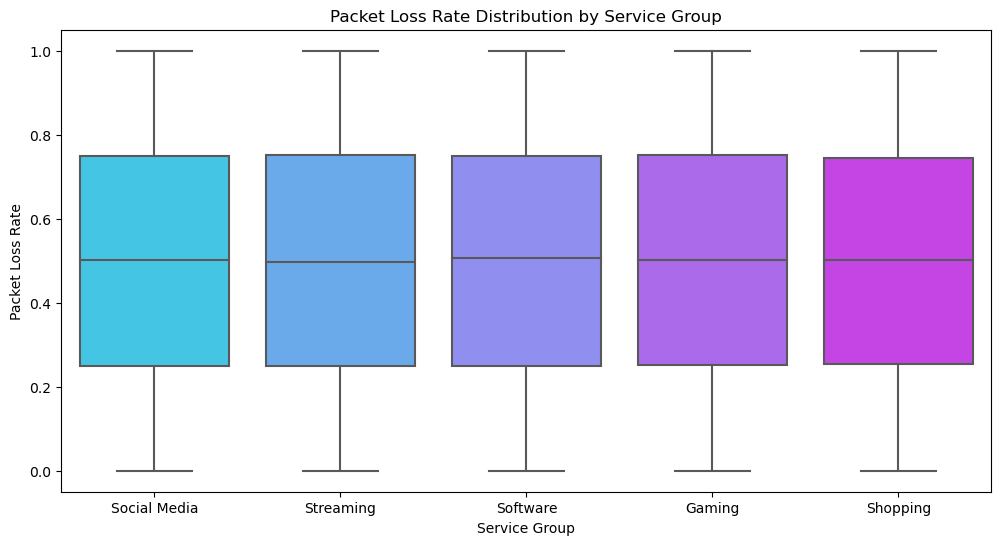

In [18]:

# Packet Loss Rate Distribution by Service Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='packet_loss_rate', palette='cool')
plt.title("Packet Loss Rate Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Packet Loss Rate")
plt.show()


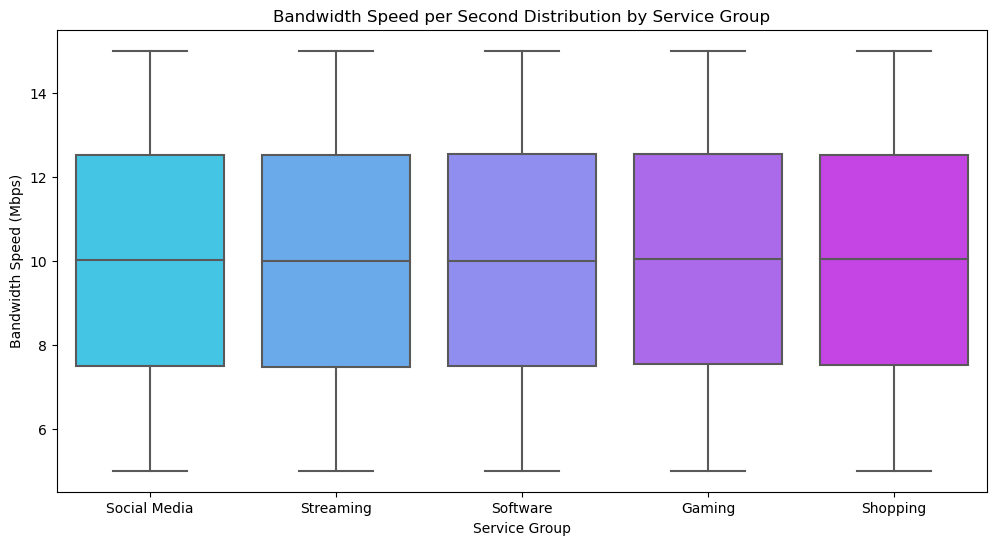

In [19]:

# Bandwidth Speed Distribution by Service Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='bandwidth_speed_per_sec_mbps', palette='cool')
plt.title("Bandwidth Speed per Second Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Bandwidth Speed (Mbps)")
plt.show()


## Correlation Heatmap for Numerical Features
A heatmap can help you understand relationships between network quality metrics and usage patterns.

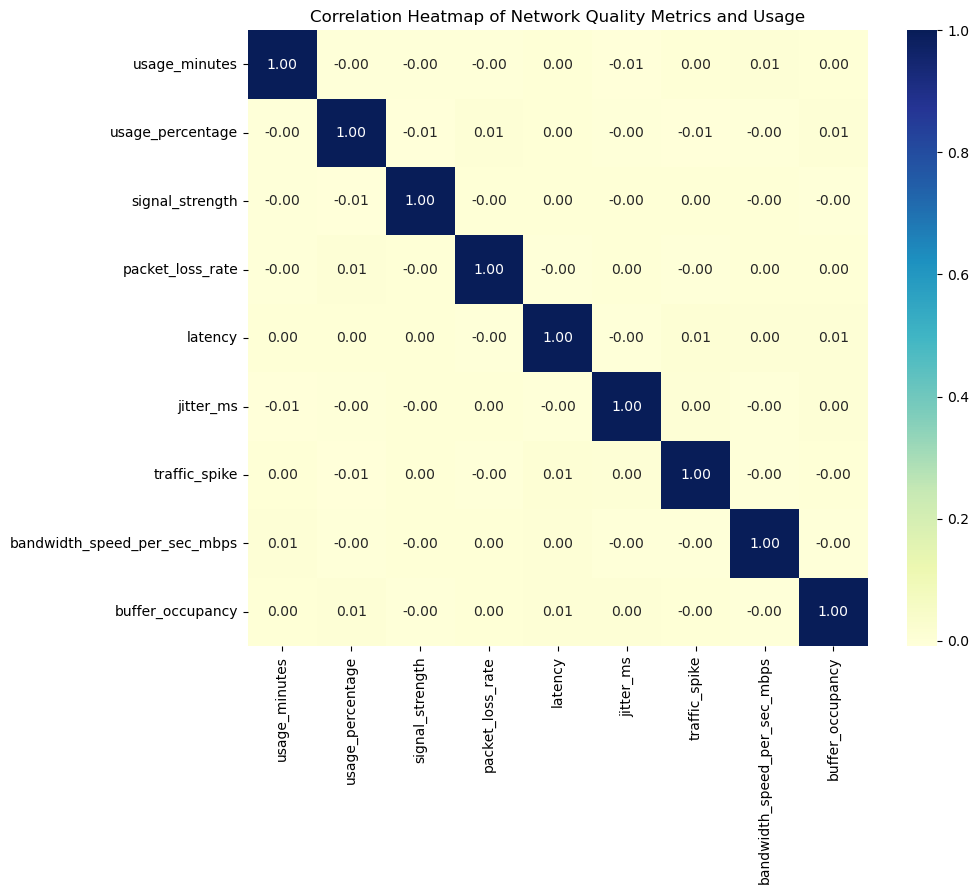

In [21]:
# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap for the numeric features only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap of Network Quality Metrics and Usage")
plt.show()


In [25]:
### Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values (if any)
# Fill numerical columns with median values and categorical columns with the mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    elif df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)


In [26]:

# Encode categorical features
label_encoders = {}
categorical_cols = ['achash', 'service_group', 'service_name', 'device_type', 'day_of_week']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [27]:

# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['usage_minutes', 'usage_percentage', 'signal_strength', 'packet_loss_rate', 
                'latency', 'jitter_ms', 'traffic_spike', 'bandwidth_speed_per_sec_mbps', 'buffer_occupancy', 'hour']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [28]:

# Verify the processed data
print("\nProcessed Dataset Sample:\n", df.head())



Processed Dataset Sample:
    achash  timestamp  service_group  service_name  usage_minutes  \
0       0 2024-01-01              2             3       1.609093   
1       1 2024-01-01              2             8       0.913669   
2       2 2024-01-01              4            18      -0.842278   
3       3 2024-01-01              4             7       0.965826   
4       4 2024-01-01              2            15       0.444257   

   usage_percentage        mac_address  device_type  signal_strength  \
0         -0.576534  02:00:00:bd:0c:47            2         0.707246   
1          1.129746  02:00:00:cd:eb:02            2         0.892726   
2         -1.310222  02:00:00:4b:dd:d6            2         0.025997   
3         -1.683049  02:00:00:8d:14:04            0        -0.837265   
4         -0.778771  02:00:00:53:4c:3c            2         0.639641   

   packet_loss_rate   latency  jitter_ms  traffic_spike  \
0         -0.413639 -0.340643  -1.126938       -1.00001   
1         -1

In [32]:
# Display the first 5 rows (head) and last 5 rows (tail) of the DataFrame
print("\nHead of Processed Dataset (First 5 rows):\n", df.head(5))
print("\nTail of Processed Dataset (Last 5 rows):\n", df.tail(5))



Head of Processed Dataset (First 5 rows):
    achash  timestamp  service_group  service_name  usage_minutes  \
0       0 2024-01-01              2             3       1.609093   
1       1 2024-01-01              2             8       0.913669   
2       2 2024-01-01              4            18      -0.842278   
3       3 2024-01-01              4             7       0.965826   
4       4 2024-01-01              2            15       0.444257   

   usage_percentage        mac_address  device_type  signal_strength  \
0         -0.576534  02:00:00:bd:0c:47            2         0.707246   
1          1.129746  02:00:00:cd:eb:02            2         0.892726   
2         -1.310222  02:00:00:4b:dd:d6            2         0.025997   
3         -1.683049  02:00:00:8d:14:04            0        -0.837265   
4         -0.778771  02:00:00:53:4c:3c            2         0.639641   

   packet_loss_rate   latency  jitter_ms  traffic_spike  \
0         -0.413639 -0.340643  -1.126938       -1.00001

In [33]:
# Combine head and tail to show the first 5 and last 5 rows together
print("\nHead and Tail of Processed Dataset (First and Last 5 rows):\n")
print(pd.concat([df.head(5), df.tail(5)]))



Head and Tail of Processed Dataset (First and Last 5 rows):

        achash  timestamp  service_group  service_name  usage_minutes  \
0            0 2024-01-01              2             3       1.609093   
1            1 2024-01-01              2             8       0.913669   
2            2 2024-01-01              4            18      -0.842278   
3            3 2024-01-01              4             7       0.965826   
4            4 2024-01-01              2            15       0.444257   
101280       0 2024-07-30              2            15       0.235630   
101281       1 2024-07-30              4            11       0.096545   
101282       2 2024-07-30              2            15       1.539551   
101283       3 2024-07-30              2            15       1.157067   
101284       4 2024-07-30              2            10      -0.511951   

        usage_percentage        mac_address  device_type  signal_strength  \
0              -0.576534  02:00:00:bd:0c:47            2 

In [34]:
# Combine the head and tail of the dataset
head_tail_df = pd.concat([df.head(5), df.tail(5)])

# Display the result
head_tail_df

,achash,timestamp,service_group,service_name,usage_minutes,usage_percentage,mac_address,device_type,signal_strength,packet_loss_rate,latency,jitter_ms,traffic_spike,bandwidth_speed_per_sec_mbps,buffer_occupancy,day_of_week,hour
0,0,2024-01-01,2,3,1.609093,-0.576534,02:00:00:bd:0c:47,2,0.707246,-0.413639,-0.340643,-1.126938,-1.00001,0.849457,1.331863,1,-1.661171
1,1,2024-01-01,2,8,0.913669,1.129746,02:00:00:cd:eb:02,2,0.892726,-1.260273,1.051352,0.672500,-1.00001,1.545095,1.126959,1,-1.661171
2,2,2024-01-01,4,18,-0.842278,-1.310222,02:00:00:4b:dd:d6,2,0.025997,-1.070049,1.156033,0.835142,-1.00001,0.326863,0.864154,1,-1.661171
3,3,2024-01-01,4,7,0.965826,-1.683049,02:00:00:8d:14:04,0,-0.837265,-0.085260,-0.173672,0.066920,0.99999,0.458376,1.431021,1,-1.661171
4,4,2024-01-01,2,15,0.444257,-0.778771,02:00:00:53:4c:3c,2,0.639641,1.207775,0.705300,-0.818957,-1.00001,-1.642383,1.676490,1,-1.661171
101280,0,2024-07-30,2,15,0.235630,-0.525202,02:00:00:bd:0c:47,1,-0.674320,-0.453558,1.618878,1.433801,0.99999,0.908292,0.902639,5,-1.661171
101281,1,2024-07-30,4,11,0.096545,-0.075958,02:00:00:cd:eb:02,2,-1.142354,1.039420,-0.700537,-0.521358,0.99999,0.482603,1.203234,5,-1.661171
101282,2,2024-07-30,2,15,1.539551,-1.248470,02:00:00:4b:dd:d6,1,0.887525,0.140023,-1.187605,1.018546,-1.00001,-0.202653,-1.206730,5,-1.661171
101283,3,2024-07-30,2,15,1.157067,0.404934,02:00:00:8d:14:04,1,-0.209754,0.868983,0.797004,0.959718,0.99999,-0.406846,-0.540358,5,-1.661171
101284,4,2024-07-30,2,10,-0.511951,0.810181,02:00:00:53:4c:3c,0,1.300088,0.403837,0.762399,0.568686,-1.00001,-0.116131,0.368709,5,-1.661171


In [29]:

# # Save the preprocessed data if needed
# df.to_csv("preprocessed_balanced_dataset.csv", index=False)
# print("Preprocessed dataset saved as 'preprocessed_balanced_dataset.csv'")

In [36]:
!pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/15/9a/a8d35652e869011a3bae9e0888f4c62157bf9067c9be15535602c73039dd/prophet-1.1.6-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/52/99/de904580147b409352a98b92ed7d756c500d0818f5f759df741c3b6fa319/holidays-0.60-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e046a4a9b10177fa3/stanio-0.5.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 10.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.9 MB/s eta 

## Forecasting service_group Usage Using Prophet
The following code applies Prophet to forecast each service_group over time.

11:52:26 - cmdstanpy - INFO - Chain [1] start processing
11:52:26 - cmdstanpy - INFO - Chain [1] done processing


Aggregated Data Sample:
          date  Gaming  Shopping  Social Media  Software  Streaming
0  2024-01-01      87         0           113       144        136
1  2024-01-02      90         0           113       146        131
2  2024-01-03      71         0           107       143        159
3  2024-01-04      86         0            98       138        158
4  2024-01-05      29        62           123       137        129


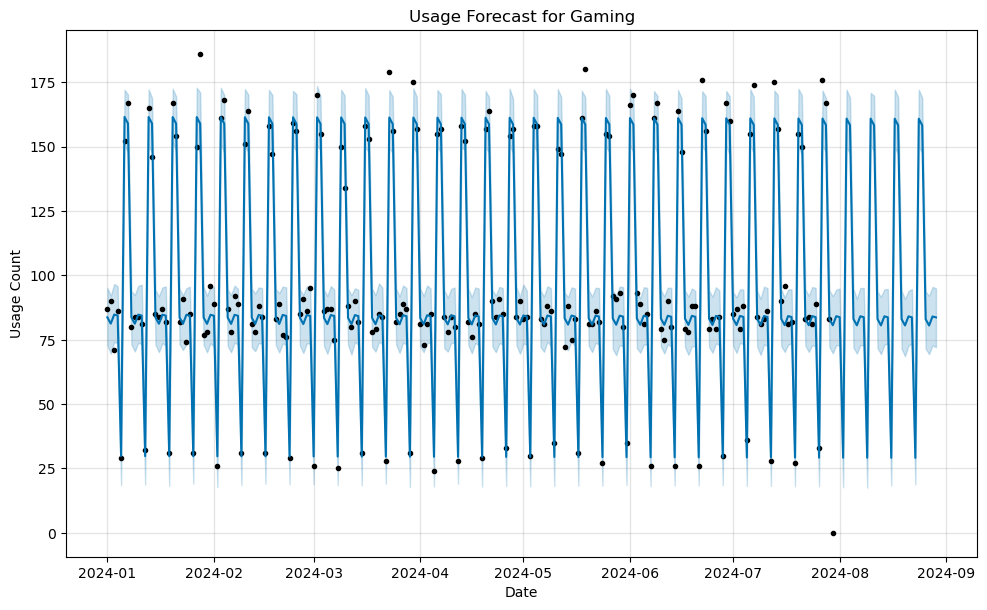

11:52:26 - cmdstanpy - INFO - Chain [1] start processing
11:52:26 - cmdstanpy - INFO - Chain [1] done processing


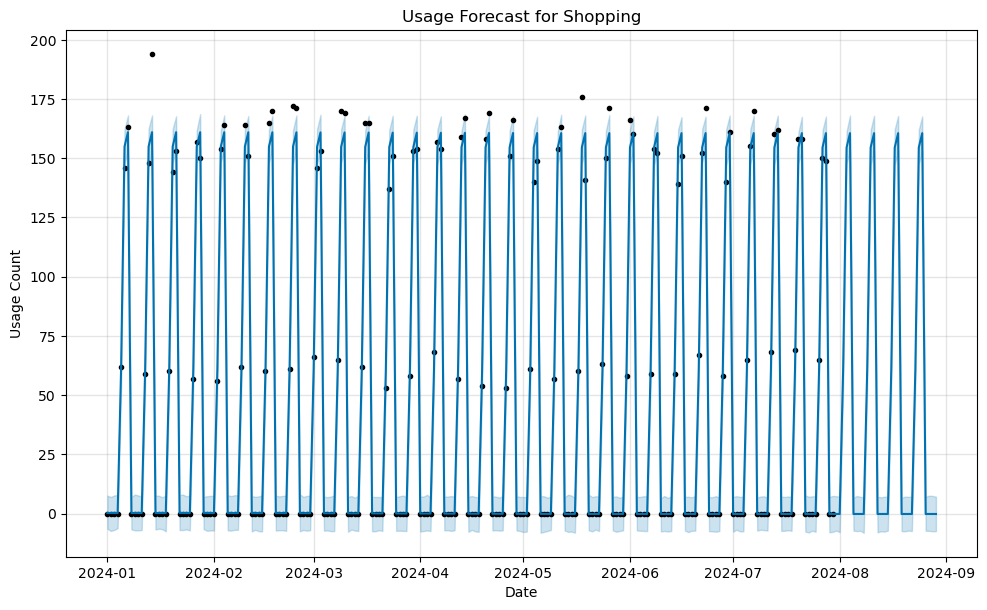

11:52:27 - cmdstanpy - INFO - Chain [1] start processing
11:52:27 - cmdstanpy - INFO - Chain [1] done processing


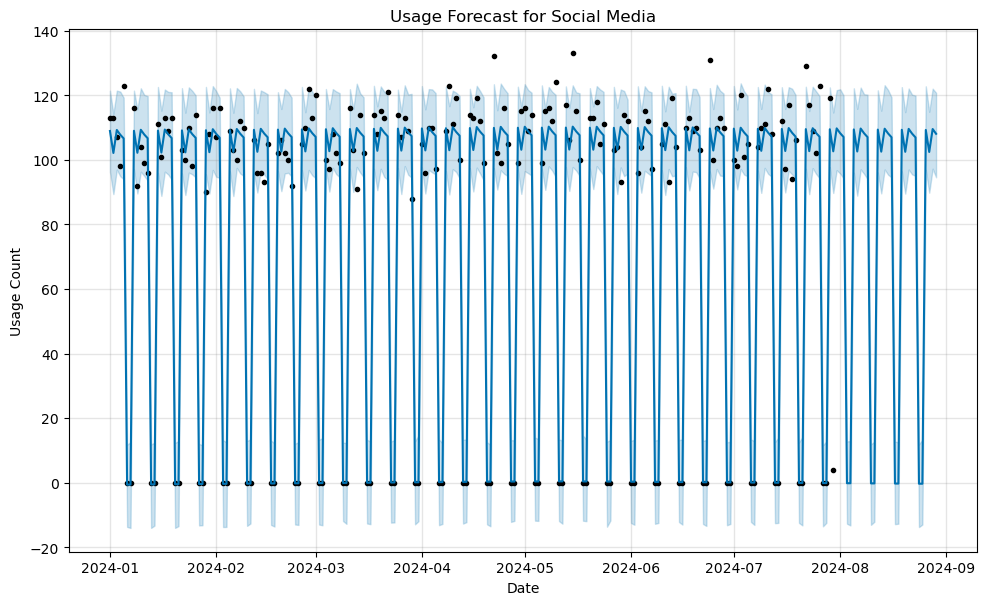

11:52:27 - cmdstanpy - INFO - Chain [1] start processing
11:52:27 - cmdstanpy - INFO - Chain [1] done processing


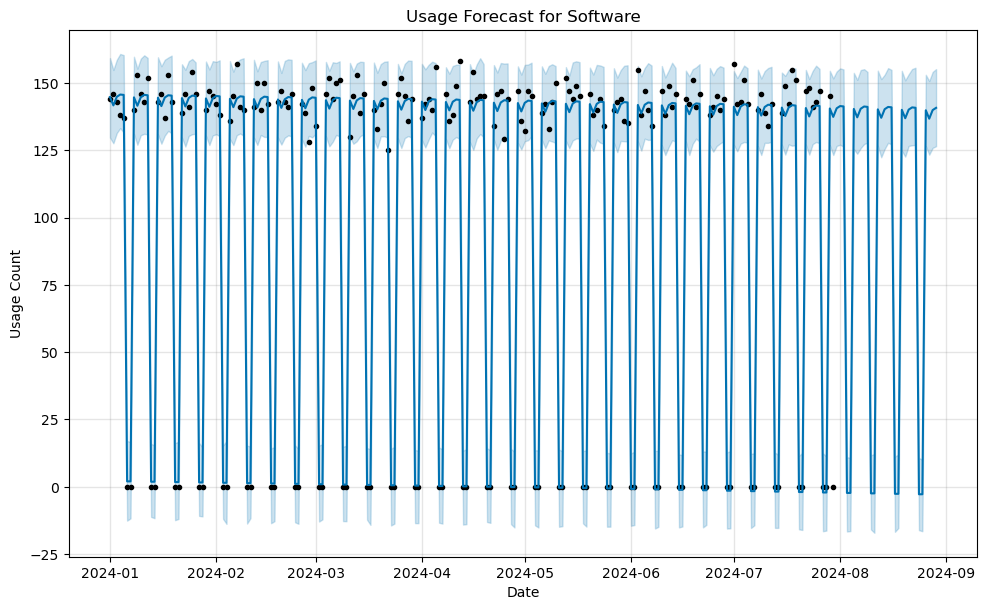

11:52:27 - cmdstanpy - INFO - Chain [1] start processing
11:52:27 - cmdstanpy - INFO - Chain [1] done processing


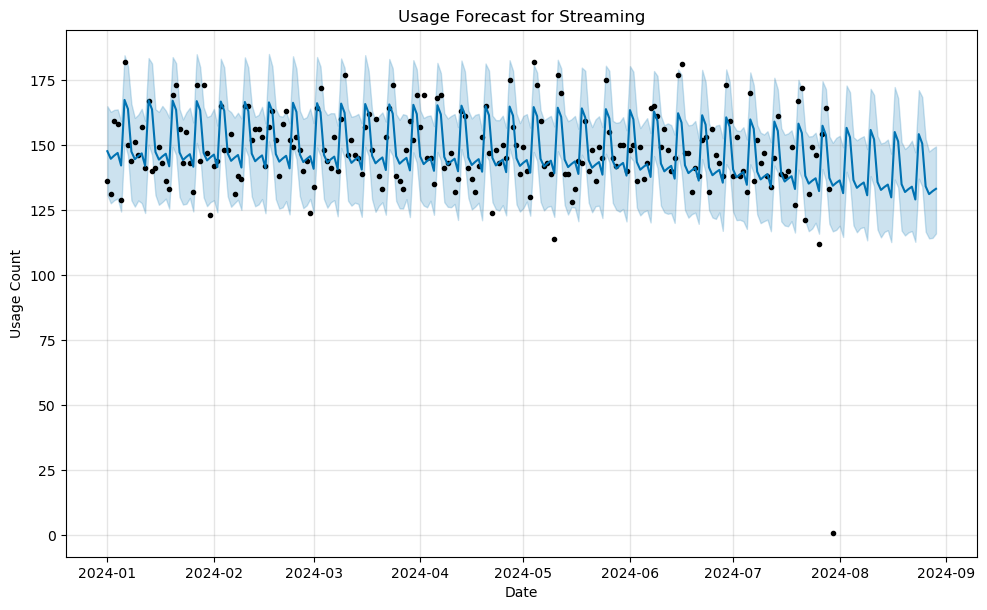

In [54]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("balanced_dataset_time.csv")

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 1: Aggregate Data - Daily usage count for each service group
# Group by date and count occurrences of each service group
df['date'] = df['timestamp'].dt.date  # Extract date only (ignore time for daily aggregation)
df_daily = df.groupby(['date', 'service_group']).size().unstack(fill_value=0).reset_index()
df_daily.columns = ['date'] + list(df_daily.columns[1:])  # Rename columns for clarity

# Check that df_daily is created successfully
print("Aggregated Data Sample:\n", df_daily.head())

# Step 2: Forecast each service group using Prophet
forecasts = {}  # Dictionary to store forecast results for each service group

# Loop through each service group in the dataset (skipping the 'date' column)
for service in df_daily.columns[1:]:
    # Prepare the data for Prophet
    df_prophet = df_daily[['date', service]].rename(columns={'date': 'ds', service: 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_prophet)
    
    # Create a DataFrame to hold future predictions (next 30 days)
    future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future
    forecast = model.predict(future)
    
    # Store forecast results
    forecasts[service] = forecast
    
    # Plot the forecast
    model.plot(forecast)
    plt.title(f"Usage Forecast for {service}")
    plt.xlabel("Date")
    plt.ylabel("Usage Count")
    plt.show()


11:54:04 - cmdstanpy - INFO - Chain [1] start processing
11:54:04 - cmdstanpy - INFO - Chain [1] done processing


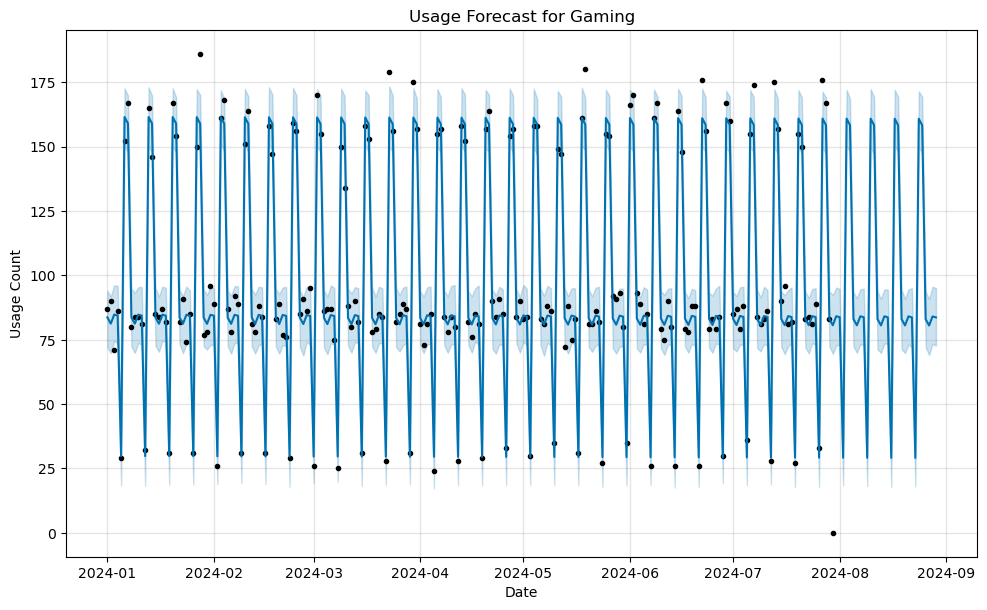

11:54:04 - cmdstanpy - INFO - Chain [1] start processing
11:54:04 - cmdstanpy - INFO - Chain [1] done processing


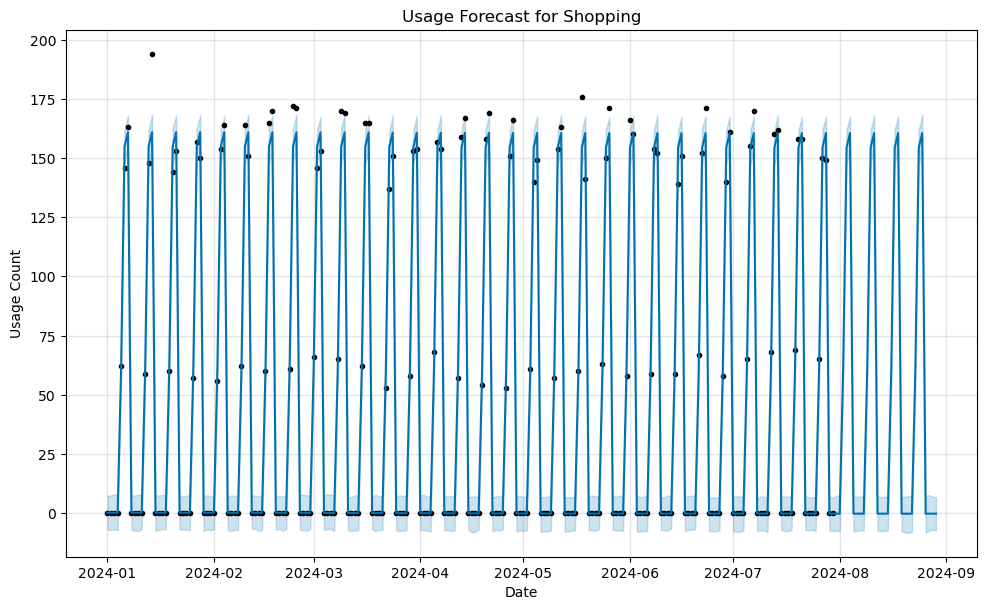

11:54:05 - cmdstanpy - INFO - Chain [1] start processing
11:54:05 - cmdstanpy - INFO - Chain [1] done processing


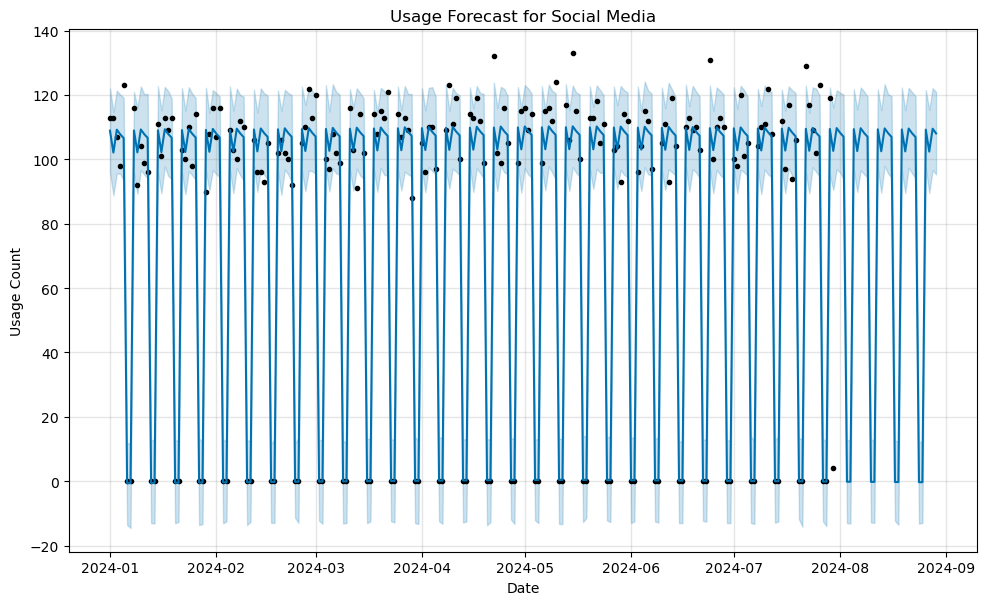

11:54:05 - cmdstanpy - INFO - Chain [1] start processing
11:54:05 - cmdstanpy - INFO - Chain [1] done processing


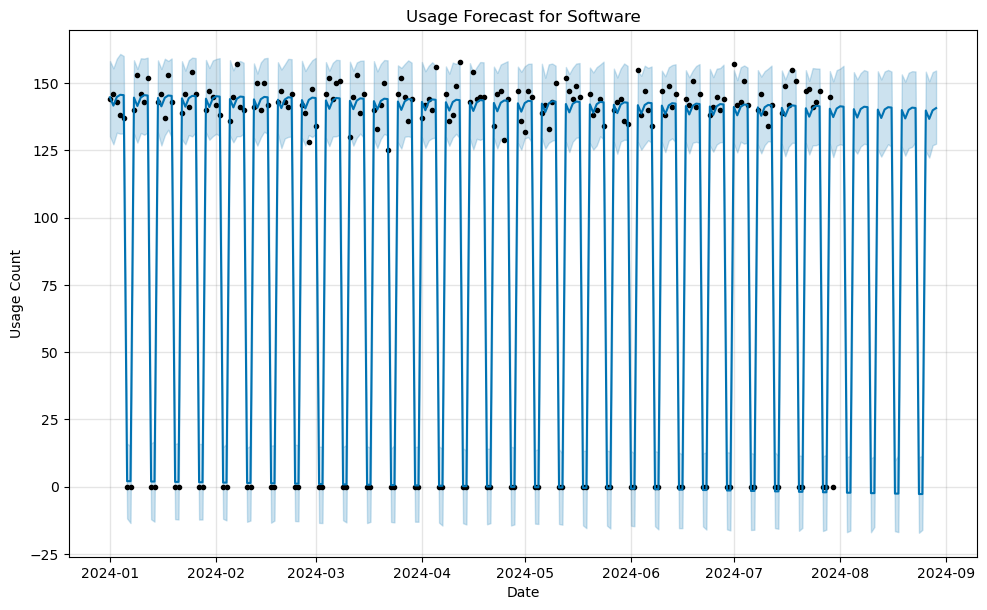

11:54:05 - cmdstanpy - INFO - Chain [1] start processing
11:54:05 - cmdstanpy - INFO - Chain [1] done processing


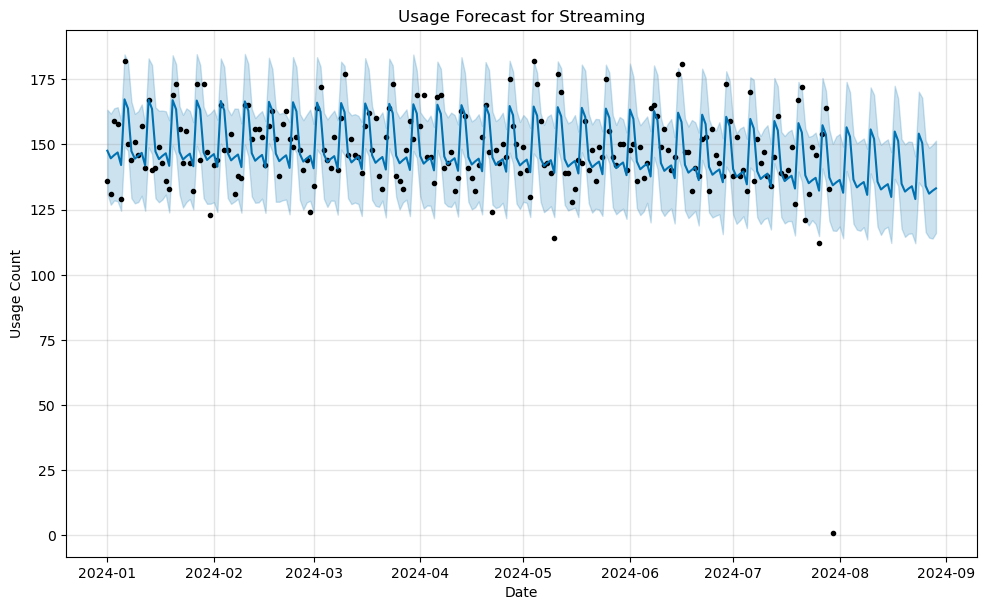

In [55]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("balanced_dataset_time.csv")

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 1: Aggregate Data - Daily usage count for each service group
# Group by date and count occurrences of each service group
df['date'] = df['timestamp'].dt.date  # Extract date only (ignore time for daily aggregation)
df_daily = df.groupby(['date', 'service_group']).size().unstack(fill_value=0).reset_index()
df_daily.columns = ['date'] + list(df_daily.columns[1:])  # Rename columns for clarity

# Step 2: Forecast each service group using Prophet
forecasts = {}  # Dictionary to store forecast results for each service group

# Loop through each service group in the dataset (skipping the 'date' column)
for service in df_daily.columns[1:]:
    # Prepare the data for Prophet
    df_prophet = df_daily[['date', service]].rename(columns={'date': 'ds', service: 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_prophet)
    
    # Create a DataFrame to hold future predictions (next 30 days)
    future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future
    forecast = model.predict(future)
    
    # Store forecast results
    forecasts[service] = forecast
    
    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f"Usage Forecast for {service}")
    plt.xlabel("Date")
    plt.ylabel("Usage Count")
    
    # Save the plot with a unique filename
    plt.savefig(f"{service}_usage_forecast.png")  # Saves as "service_name_usage_forecast.png"
    plt.show()


## Overlay Observed and Forecasted Values with Labels
Instead of showing only the forecasted values, overlay the observed data with the forecasted trend and add labels for each period. This makes it easier to distinguish between the actual data points and forecasted trends.

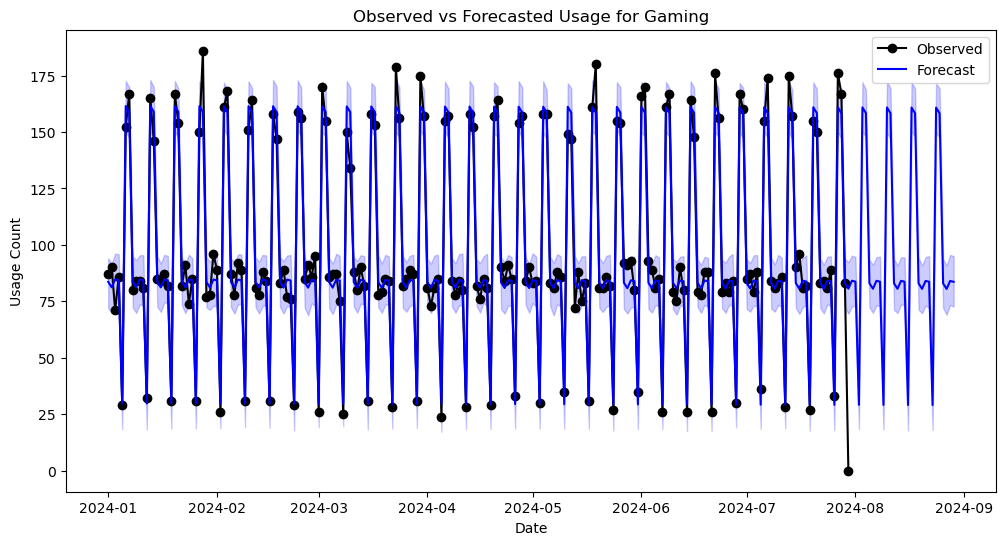

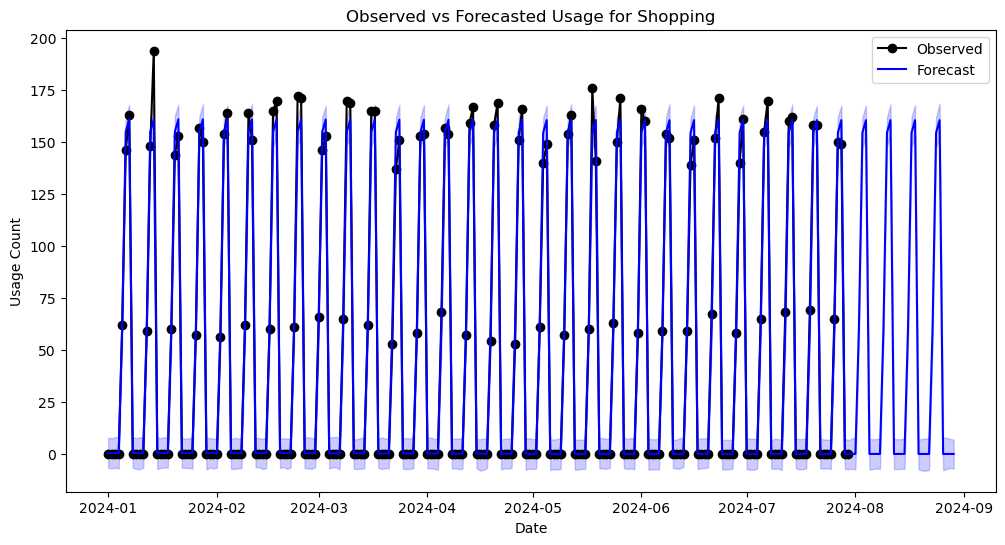

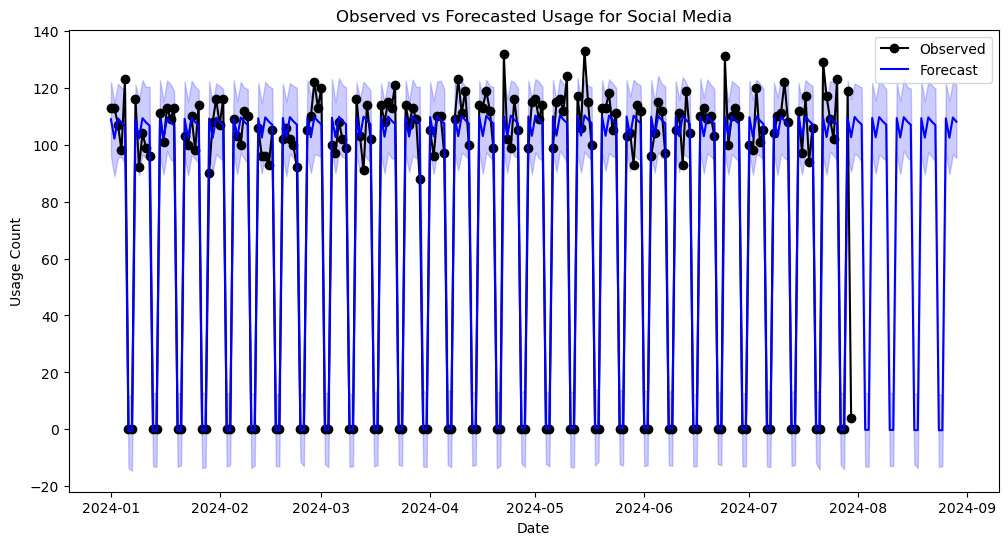

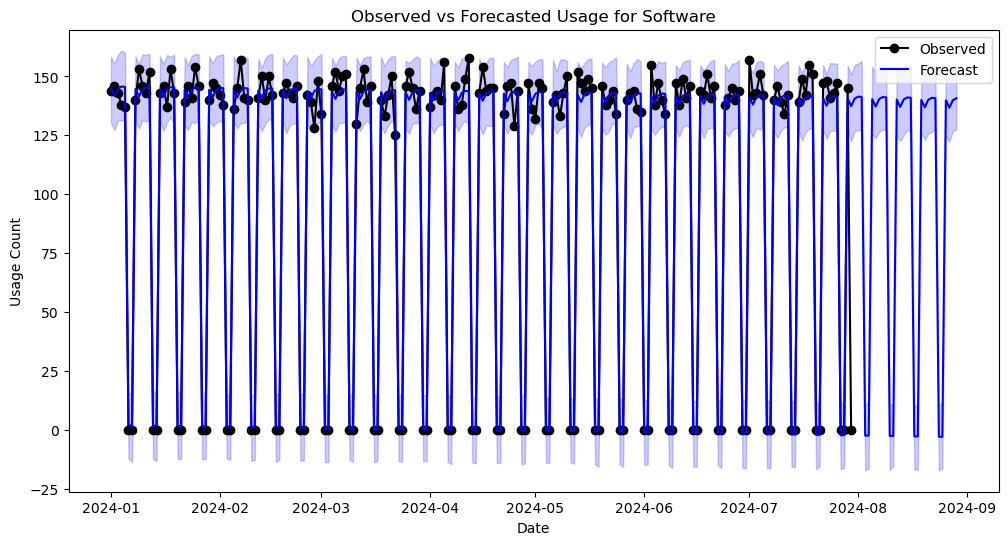

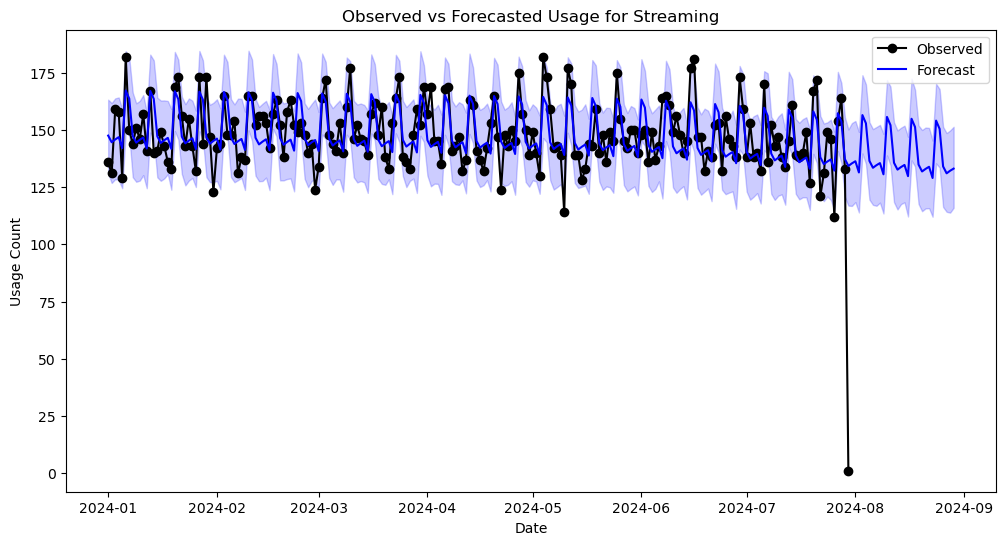

In [56]:
# Overlay observed and forecasted values
for service, forecast in forecasts.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df_daily['date'], df_daily[service], label='Observed', color='black', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
    plt.title(f"Observed vs Forecasted Usage for {service}")
    plt.xlabel("Date")
    plt.ylabel("Usage Count")
    plt.legend()
    plt.show()


## Weekly and Monthly Seasonality Plots
If the data shows weekly or monthly trends, you can plot the average usage per day of the week or month to observe patterns more clearly. This is particularly helpful if you want to see which days or times have the highest or lowest usage.

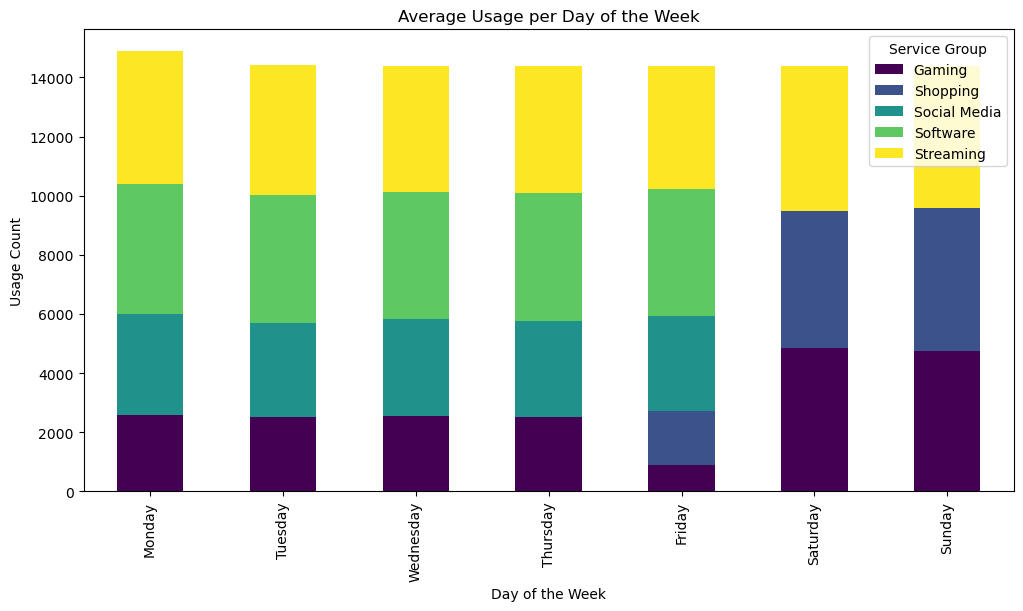

In [58]:
# Weekly usage pattern
df['day_of_week'] = df['timestamp'].dt.day_name()
weekly_usage = df.groupby(['day_of_week', 'service_group']).size().unstack()
weekly_usage = weekly_usage.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_usage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Average Usage per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Usage Count")
plt.legend(title='Service Group')
plt.show()


## Heatmap of Usage by Hour and Day of the Week
Create a heatmap to show the intensity of usage for each hour of each day. This gives a clear overview of when the service is used most frequently across the week.

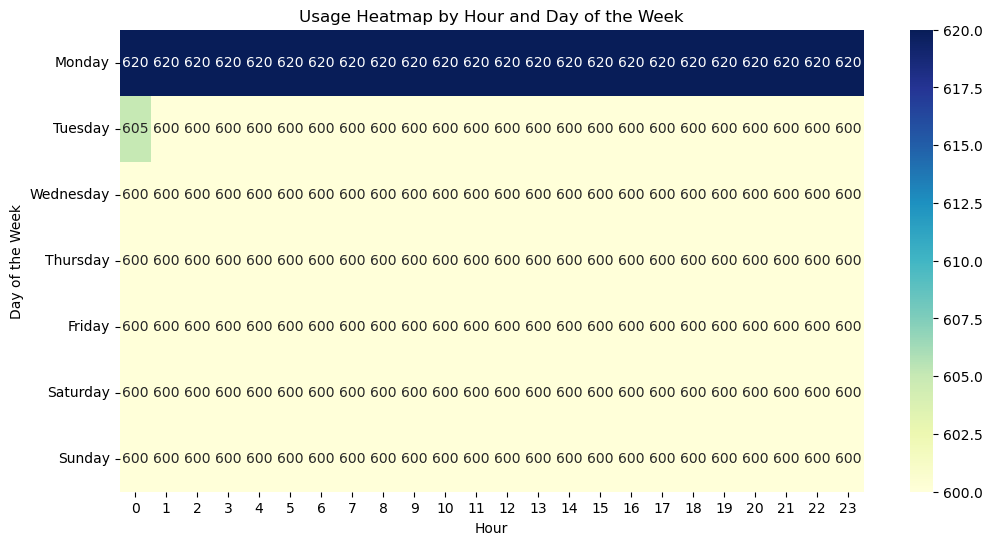

In [59]:
# Extract hour from timestamp
df['hour'] = df['timestamp'].dt.hour

# Group by day of week and hour to calculate average usage
hourly_usage = df.groupby(['day_of_week', 'hour']).size().unstack()
hourly_usage = hourly_usage.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_usage, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Usage Heatmap by Hour and Day of the Week")
plt.xlabel("Hour")
plt.ylabel("Day of the Week")
plt.show()


## Stacked Area Plot to Show Trends Over Time
A stacked area plot helps show the contribution of each service group over time, making it easy to see trends for multiple groups in one visualization.

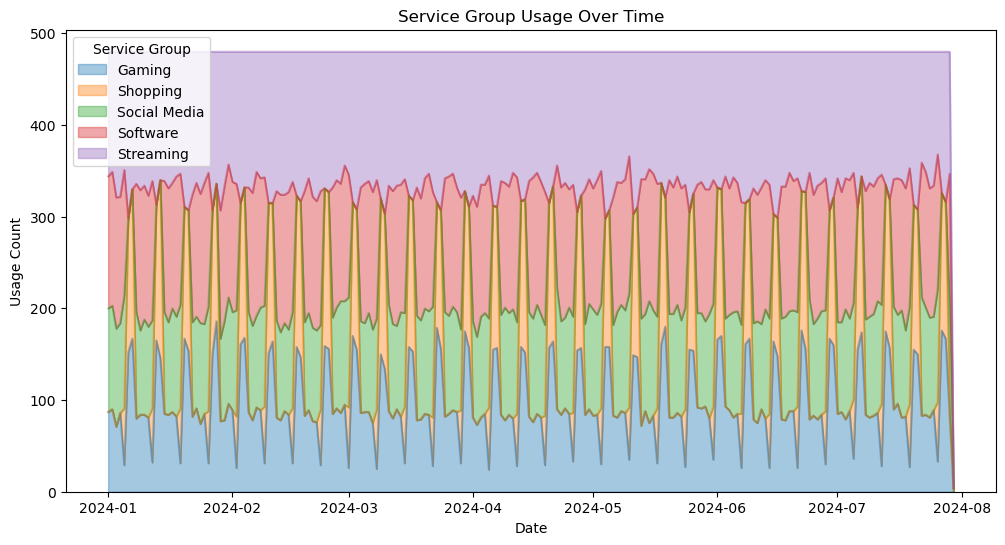

In [60]:
# Stacked area plot
df_daily.set_index('date', inplace=True)
df_daily.plot.area(figsize=(12, 6), alpha=0.4)
plt.title("Service Group Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Usage Count")
plt.legend(title='Service Group')
plt.show()


## Box Plot of Usage by Service Group
A box plot can help you visualize the spread and outliers for each service group over time, giving insights into usage consistency and variability.

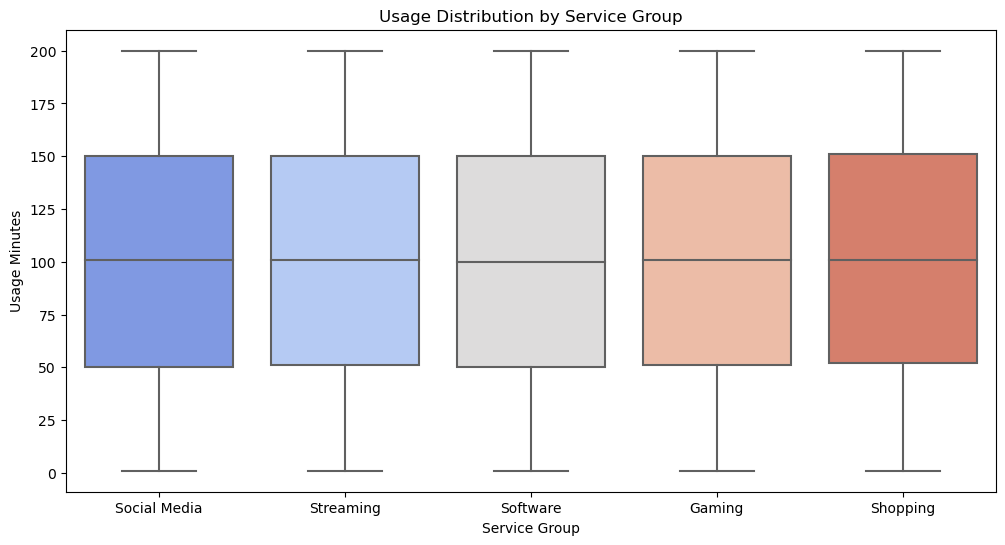

In [61]:
# Box plot by service group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='service_group', y='usage_minutes', palette='coolwarm')
plt.title("Usage Distribution by Service Group")
plt.xlabel("Service Group")
plt.ylabel("Usage Minutes")
plt.show()


## Decomposition Plot to Analyze Seasonality, Trend, and Residuals
Decomposing the time series for each service group into trend, seasonal, and residual components can help you understand the underlying patterns more clearly. You can use seasonal_decompose from statsmodels for this purpose.

<Figure size 1200x800 with 0 Axes>

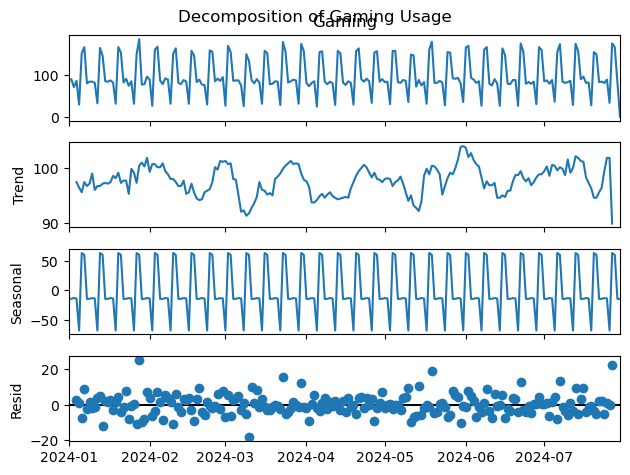

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Example decomposition for one service group (e.g., "Gaming")
service = 'Gaming'
decomposed = seasonal_decompose(df_daily[service], model='additive', period=7)  # Weekly period

plt.figure(figsize=(12, 8))
decomposed.plot()
plt.suptitle(f"Decomposition of {service} Usage")
plt.show()
